In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [2]:
rng = np.random.default_rng(1)
x1 = rng.normal(loc = 10, scale = 1, size = 1000)
x2 = rng.normal(loc = 13, scale = 1, size = 2000)

cls1 = 1
cls2 = 0

(array([ 15.,  35., 150., 313., 481., 462., 331., 155.,  45.,  13.]),
 array([ 9.82783241, 10.46365779, 11.09948317, 11.73530855, 12.37113393,
        13.00695931, 13.64278468, 14.27861006, 14.91443544, 15.55026082,
        16.1860862 ]),
 <BarContainer object of 10 artists>)

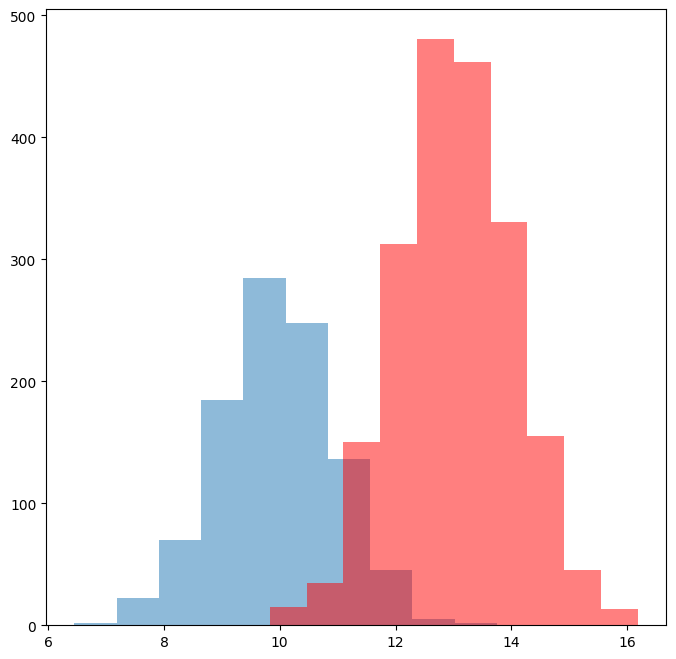

In [3]:
ax = subplots(figsize = (8, 8))[1]
ax.hist(x1, bins = 10, alpha = .5)
ax.hist(x2, bins = 10, color = "r", alpha = .5)

In [4]:
def LDA(cls1, x1, cls2, x2): 
    n1 = len(x1)
    n2 = len(x2)

    pi1 = n1 / (n1 + n2)
    pi2 = n2 / (n1 + n2)

    mu1 = np.mean(x1)
    mu2 = np.mean(x2)
    LDA_boundary = (mu1 + mu2) / 2

    sigma_squared = (1 / (n1 + n2 - 2)) * (np.sum((x1 - mu1) ** 2) + np.sum(np.sum((x2 - mu2) ** 2)))
    
    def delta(x, pi, mu, sigma_squared): 
        return x * mu / sigma_squared - mu ** 2 / (2 * sigma_squared) + np.log(pi)
                                           
    new_x1 = []
    new_x2 = []

    for x in np.concatenate((x1, x2), axis = 0): 
        if delta(x, pi1, mu1, sigma_squared) >= delta(x, pi2, mu2, sigma_squared): 
            new_x1.append(x)
        else:
            new_x2.append(x)

    return new_x1, new_x2, LDA_boundary

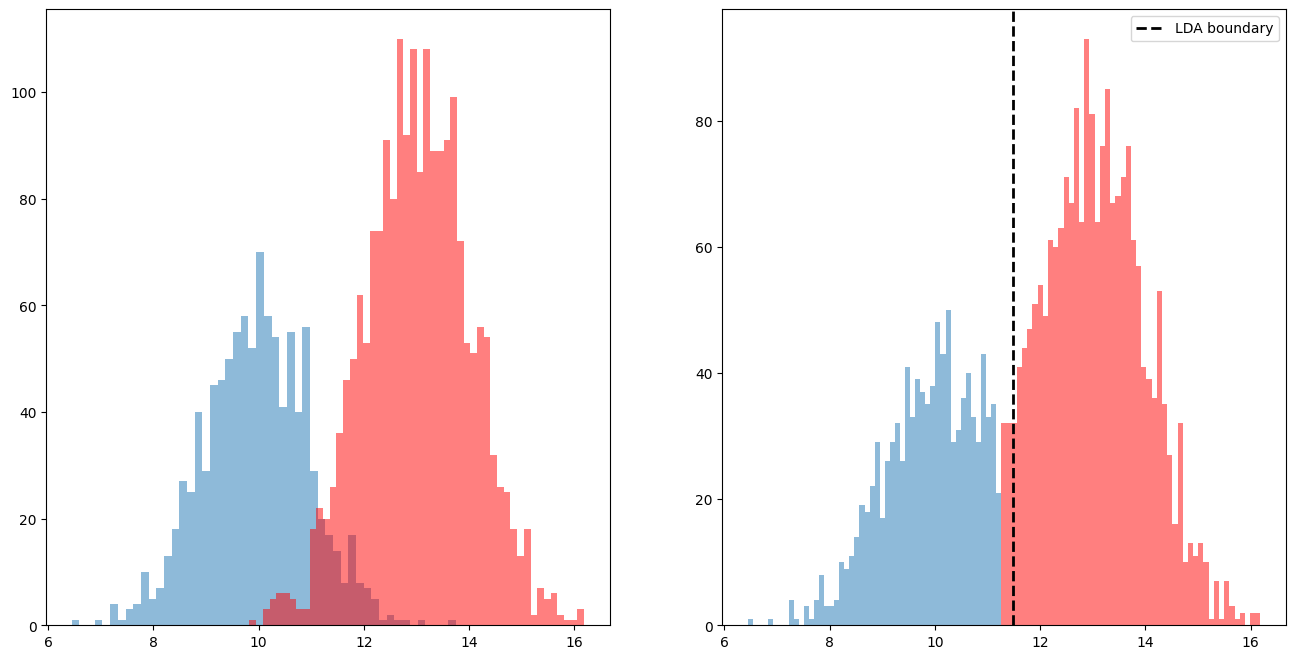

In [5]:
new_x1, new_x2, LDA_boundary = LDA(cls1, x1, cls2, x2)
axes = subplots(1, 2, figsize = (16, 8))[1]
axes[0].hist(x1, bins = 50, alpha = .5)
axes[0].hist(x2, bins = 50, color = "r", alpha = .5)
axes[1].hist(new_x1, bins = 50, alpha = .5)
axes[1].hist(new_x2, bins = 50, color = "r", alpha = .5)
axes[1].axvline(x=LDA_boundary, color='k', linestyle='--', linewidth=2, label = "LDA boundary")
axes[1].legend()